In [1]:
import sys
!{sys.executable} -m pip install numdifftools

In [2]:
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import numdifftools as nd
sns.set(context='talk',style='white',palette='colorblind')
import numpy as np
import scipy
import scipy.io as sciio
import imageio
import numpy.linalg as LA
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib.animation import FuncAnimation
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import colorcet as ccm

matplotlib.rc('image', interpolation='nearest')
matplotlib.rc('figure',facecolor='white')
matplotlib.rc('image',cmap='viridis')
matplotlib.rc('animation',html='html5')

prop_cycle = plt.rcParams['axes.prop_cycle']
import colorcet as ccm
%matplotlib inline

In [3]:
# some functions to plot
def f(x):
    return x[0]**2-x[1]**2+3*np.sin(x[2])
def g(x):
    return (1-x[0])**2+100*(x[1]-x[0]**2)**2
def f1(x):
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2
rosen = lambda x : (1-x[0])**2 + 105.*(x[1]-x[0]**2)**2 #rosenbrock
fplot = lambda x : x[0]**2
def easy(x):
    return -x[0]**2-x[1]**2
def easy2(x):
    return x[0]**2+x[1]**2
def objective(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 -7)**2

In [4]:
import matplotlib.animation as animation
def update_lines(num, x_vec, lines):
    for line, vec in zip(lines, x_vec):
        
        vec=np.array(vec)
        line.set_data(vec[:num, :2].T)
    """if(num==0):
        for i in range(len(x_vec)):
            #plt.annotate("converged value", (x_vec[i][num][0],x_vec[i][num][1]),xytext =(x_vec[i][num][0]+.4,x_vec[i][num][1]),arrowprops = dict(facecolor ='blue',shrink = .05),color="black", ha='center',size=20)
            #plt.annotate("converged value", (x_vec[1][num][0],x_vec[1][num][1]),xytext =(x_vec[1][num][0]+.4,x_vec[1][num][1]),arrowprops = dict(facecolor ='blue',shrink = .05),color="black", ha='center',size=20)
            plt.annotate("start value {}-th point".format(i), (x_vec[i][0][0],x_vec[i][0][1]),xytext =(x_vec[i][0][0],x_vec[i][0][1]+1),arrowprops = dict(facecolor ='blue',shrink = .05),color="black", ha='center',size=20)
    """
    return lines

In [5]:
def plotrange(x_vec):
    xmin = x_vec[0][0][0]
    ymin = x_vec[0][0][1]
    xmax = xmin
    ymax = ymin
    for i in range(len(x_vec)):
        for j in range(len(x_vec[i])):
            if(xmin>x_vec[i][j][0]):
                xmin=x_vec[i][j][0]
            if(xmax<x_vec[i][j][0]):
                xmax=x_vec[i][j][0]
            if(ymin>x_vec[i][j][1]):
                ymin=x_vec[i][j][1]
            if(ymax<x_vec[i][j][1]):
                ymax=x_vec[i][j][1]
    return xmin,xmax,ymin,ymax

In [6]:
from opti import *

GD reached iteration limit:100
Newt converged at iteration:9


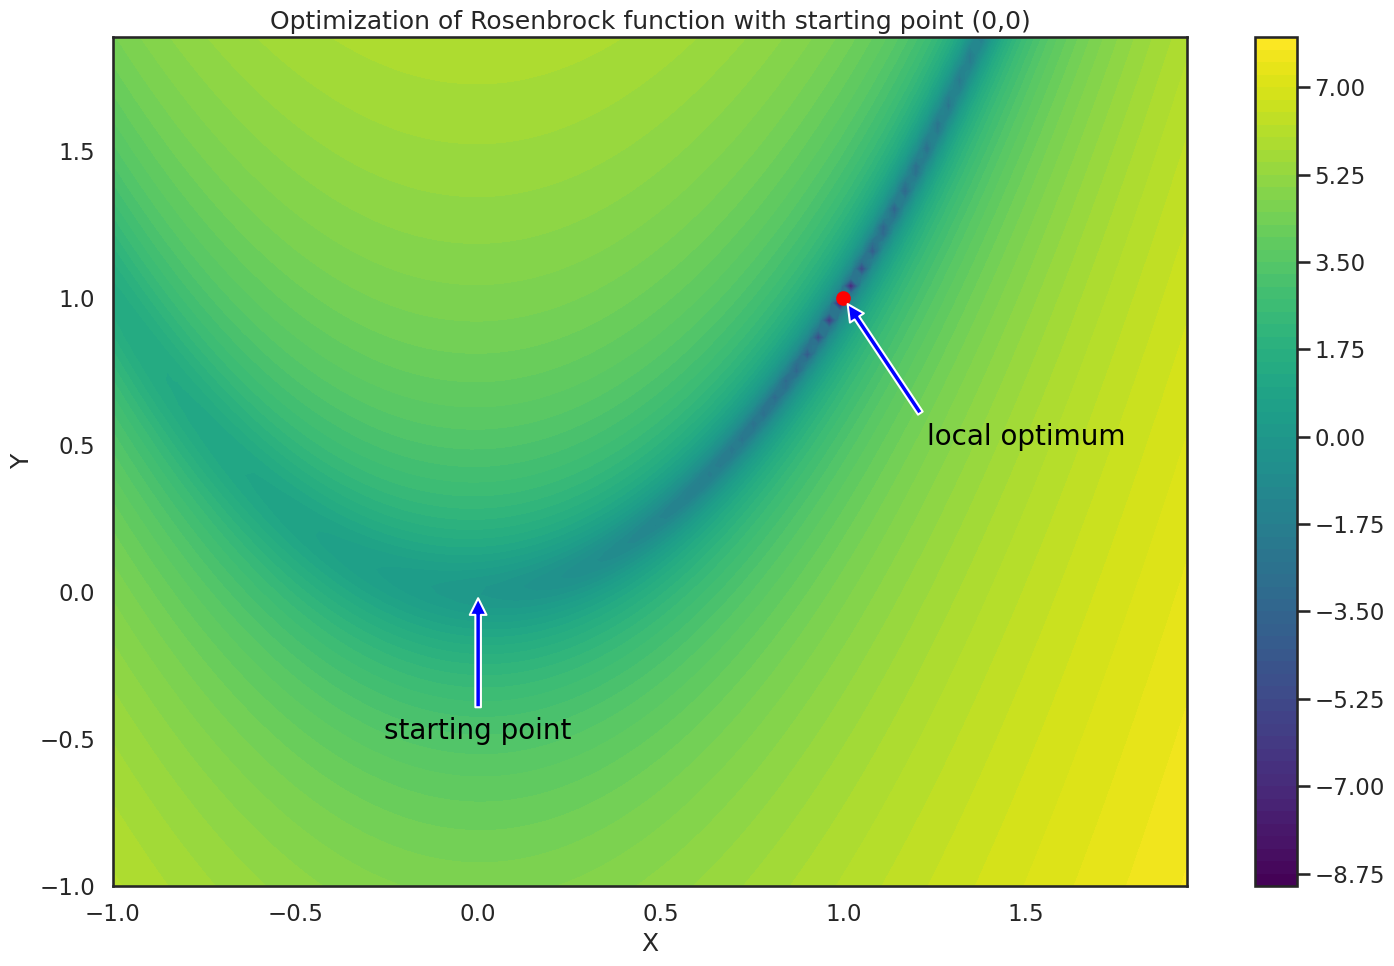

In [17]:
from IPython import display
x0,x_vec,max_len=opti.grad_des(rosen,[[0,0]],.5,100,True) # one or many start points
x0,x_ar,max_len1 = opti.ungedNewt(rosen,[[0,0]],.5,100,True)
max_len=max(max_len,max_len1)
x_vec.append(x_ar[0])
# -------------------------------------
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
labels = ["Grad-Des","ungedNewt"]
colors = ["orange","black"]
# Create lines initially without data
lines = [ax.plot([], [],"--o",label=labels[k],color=colors[k])[0] for k in range(2)]
xmin,xmax,ymin,ymax = plotrange(x_vec)
x=np.linspace(xmin-1, xmax+1, 100)
y=np.linspace(ymin-1, ymax+1, 100)
X,Y = np.meshgrid(x, y)
Z = np.log(rosen([X,Y]))
CS = ax.contourf(X, Y, Z,levels=70)
ax.set(xlim=(xmin-1, xmax+1), xlabel='X')
ax.set(ylim=(ymin-1, ymax+1), ylabel='Y')
plt.colorbar(CS)
plt.title("Optimization of Rosenbrock function with starting point (0,0)")
plt.annotate("local optimum", (1,1),xytext =(1.5,.5),arrowprops = dict(facecolor ='blue',shrink = .05),color="black", ha='center',size=20)
plt.annotate("starting point", (0,0),xytext =(0,-.5),arrowprops = dict(facecolor ='blue',shrink = .05),color="black", ha='center',size=20)
plt.scatter(1,1,c="red")
plt.tight_layout()

# Creating the Animation object
anim = animation.FuncAnimation(
    fig, update_lines, max_len, fargs=(x_vec, lines), interval=500)

anim.save('README_Anim.gif')

GD converged at iteration:14
Newt converged at iteration:3


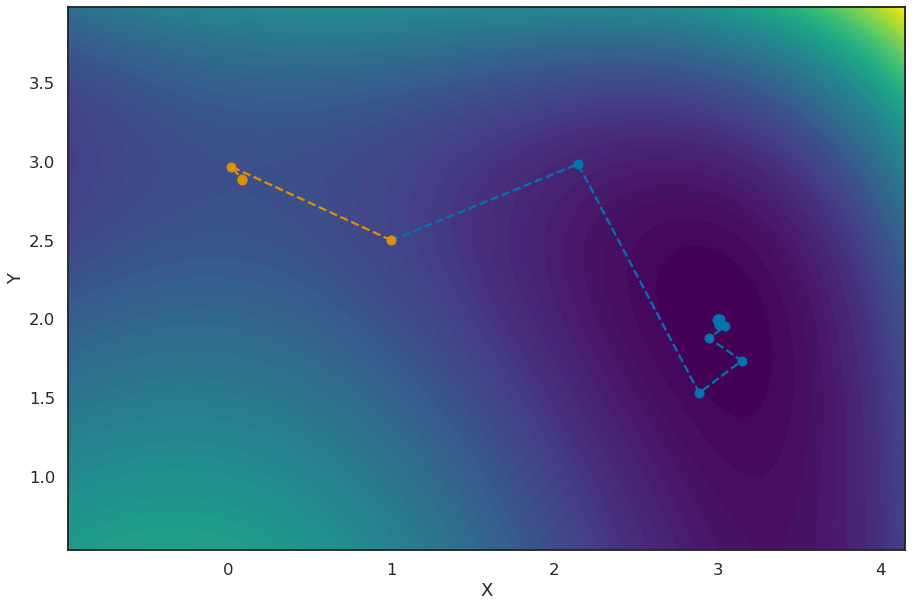

In [10]:
x0,x_vec,max_len=opti.grad_des(objective,[[1,2.5]],.005,100,True)
x0,x_ar,max_len1 = opti.ungedNewt(objective,[[1,2.5]],.005,100,True)
max_len=max(max_len,max_len1)
x_vec.append(x_ar[0]) # Compute points
# -------------------------------------
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

# Create lines initially without data
lines = [ax.plot([], [],"--o")[0] for _ in range(len(x_vec))]
#x_0 = np.array(x_vec[1])
xmin,xmax,ymin,ymax = plotrange(x_vec)
x=np.linspace(xmin-1, xmax+1, 100)
y=np.linspace(ymin-1, ymax+1, 100)
X,Y = np.meshgrid(x, y) # grid of point
Z = objective([X,Y]) # evaluation of the function on the grid
CS = ax.contourf(X, Y, Z,levels=70)
ax.set(xlim=(xmin-1, xmax+1), xlabel='X')
ax.set(ylim=(ymin-1, ymax+1), ylabel='Y')
# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, max_len, fargs=(x_vec, lines), interval=1000)
ani

Newt converged at iteration:1


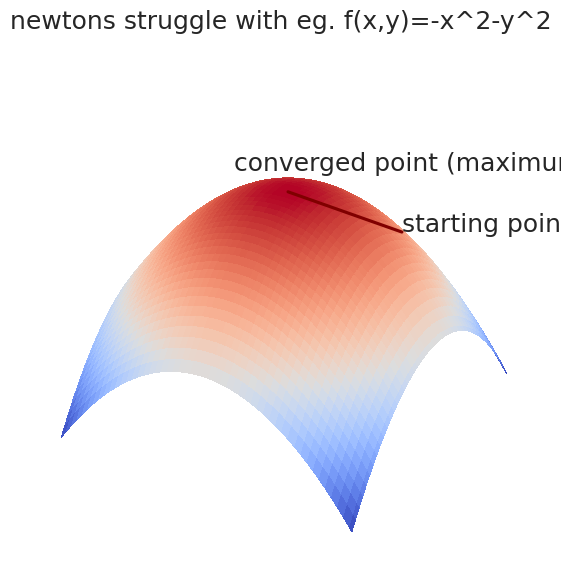

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7,7))

x0,x_vec,max_len=opti.ungedNewt(easy,[[3,3]],.05,100,False)
# -------------------------------------

# Create lines initially without data
lines = [ax.plot([], [],[],"--o")[0] for _ in range(len(x_ar))]
#x_0 = np.array(x_vec[1])
xmin,xmax,ymin,ymax = plotrange(x_vec)
x=np.linspace(-6, 6, 100)
y=np.linspace(-6,6, 100)
X,Y = np.meshgrid(x, y) # grid of point
Z = easy([X,Y])
x_ar = np.array(x_vec[0])
zs=[]
for val in x_ar:
    zs.append(easy(val))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set(xlim=(-6,6), xlabel='X')
ax.set(ylim=(-6,6), ylabel='Y')
# Creating the Animation object
x_ar = np.array(x_vec[0])
ax.plot3D(x_ar[:,0], x_ar[:,1], zs, 'maroon')
ax.text(3,3,easy([3,3]), "starting point")
ax.text(-1,-2,12, "converged point (maximum)")
#ax.scatter([3,3,easy([3,3])])
#ax.scatter(x,y,z)
ax.set_title('newtons struggle with eg. f(x,y)=-x^2-y^2')
ax.set_axis_off()
plt.savefig('newton')
plt.show()

In [21]:
from ipywidgets import interact
import ipywidgets as widgets

In [22]:
x0,x_vec_gr_1,max_len=opti.grad_des(rosen,[[0,0]],.05,100,True)
x1,x_vec_gr_2,max_len=opti.grad_des(rosen,[[-3,-4]],.05,100,True)
x2,x_vec_gr_3,max_len=opti.grad_des(rosen,[[4,4]],.05,100,True)
x3,x_vec_new_1,max_len=opti.ungedNewt(rosen,[[0,0]],.05,100,True)
x4,x_vec_new_2,max_len=opti.ungedNewt(rosen,[[-3,-4]],.05,100,True)
x5,x_vec_new_3,max_len=opti.ungedNewt(rosen,[[4,4]],.05,100,True)

GD reached iteration limit:100
GD reached iteration limit:100
GD reached iteration limit:100
Newt converged at iteration:11
Newt converged at iteration:27
Newt converged at iteration:24


In [23]:
x_all = [LA.norm(np.abs([1,1]-np.array(x_vec_gr_1[0])),axis=1),LA.norm(np.abs([1,1]-np.array(x_vec_gr_2[0])),axis=1),LA.norm(np.abs([1,1]-np.array(x_vec_gr_3[0])),axis=1),
         LA.norm(np.abs([1,1]-np.array(x_vec_new_1[0])),axis=1),LA.norm(np.abs([1,1]-np.array(x_vec_new_2[0])),axis=1),LA.norm(np.abs([1,1]-np.array(x_vec_new_3[0])),axis=1)]
len(x_all)

6

In [24]:
xs = widgets.Dropdown(
    options=[("x0=[0,0]",0), ("x0=[-3,-4]",1), ("x0=[4,4]",2)],
    description='Startpoint:')

In [25]:
def plotf(xs=0):
    fig,ax = plt.subplots(figsize=(10,7))
    ax.plot(np.arange(len(x_all[xs])),x_all[xs],label="Gradient Descent")
    ax.plot(np.arange(len(x_all[xs+3])),x_all[xs+3],label="ungNewt")
    #plt.yscale("log")
    plt.xlabel("#Iteration")
    plt.ylabel("Distance to local minimum (L2)")
    plt.legend()
    ax.set_title("convergence graph for Grad vs. Newt")
widgets.interact(plotf, xs=xs)

interactive(children=(Dropdown(description='Startpoint:', options=(('x0=[0,0]', 0), ('x0=[-3,-4]', 1), ('x0=[4…

<function __main__.plotf(xs=0)>

GD converged at iteration:90
Newt converged at iteration:25


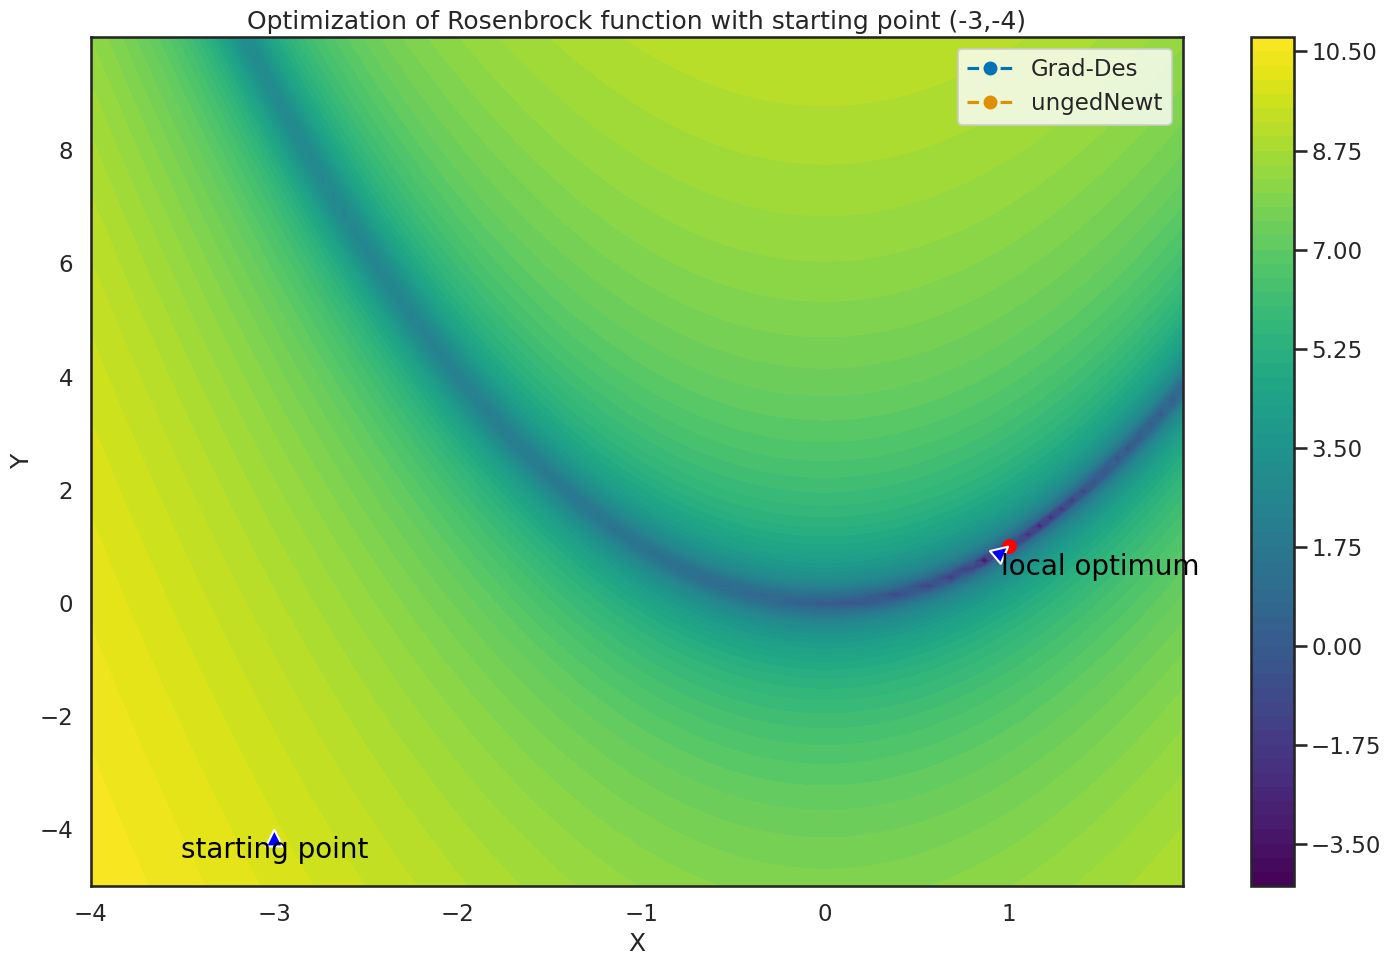

In [26]:
x0,x_vec,max_len=opti.grad_des(rosen,[[-3,-4]],.5,100,True)
x0,x_ar,max_len1 = opti.ungedNewt(rosen,[[-3,-4]],.5,100,True)
max_len=max(max_len,max_len1)
x_vec.append(x_ar[0]) # Compute points
# -------------------------------------
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
labels = ["Grad-Des","ungedNewt"]
# Create lines initially without data
lines = [ax.plot([], [],"--o",label=labels[k])[0] for k in range(len(x_vec))]
#x_0 = np.array(x_vec[1])
xmin,xmax,ymin,ymax = plotrange(x_vec)
x=np.linspace(xmin-1, xmax+1, 100)
y=np.linspace(ymin-1, ymax+1, 100)
X,Y = np.meshgrid(x, y) # grid of point
Z = np.log(rosen([X,Y])) # evaluation of the function on the grid
CS = ax.contourf(X, Y, Z,levels=70)
ax.set(xlim=(xmin-1, xmax+1), xlabel='X')
ax.set(ylim=(ymin-1, ymax+1), ylabel='Y')
ax.legend()
plt.colorbar(CS)
plt.title("Optimization of Rosenbrock function with starting point (-3,-4)")
plt.annotate("local optimum", (1,1),xytext =(1.5,.5),arrowprops = dict(facecolor ='blue',shrink = .05),color="black", ha='center',size=20)
plt.annotate("starting point", (-3,-4),xytext =(-3,-4.5),arrowprops = dict(facecolor ='blue',shrink = .05),color="black", ha='center',size=20)
plt.scatter(1,1,c="red")
plt.tight_layout()

# Creating the Animation object
anim = animation.FuncAnimation(
    fig, update_lines, max_len, fargs=(x_vec, lines), interval=500)
anim.save('README_Anim.gif')